# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.129553e+01     6.549883e+00
 * time: 0.0042188167572021484
     1     2.852370e+01     5.994186e+00
 * time: 0.012306928634643555
     2     2.107307e+01     5.844617e+00
 * time: 0.0314328670501709
     3     1.271034e+01     1.939573e+00
 * time: 0.05446791648864746
     4     1.222871e+01     3.575160e+00
 * time: 0.07042098045349121
     5     1.163044e+01     2.056257e+00
 * time: 0.0863809585571289
     6     9.845075e+00     1.613303e+00
 * time: 0.10232782363891602
     7     9.209899e+00     1.262096e+00
 * time: 0.11830496788024902
     8     8.873294e+00     6.406550e-01
 * time: 0.1342449188232422
     9     8.813573e+00     1.003651e+00
 * time: 0.14624500274658203
    10     8.809532e+00     1.074073e+00
 * time: 0.15825486183166504
    11     8.765965e+00     7.490870e-01
 * time: 0.17027497291564941
    12     8.652554e+00     5.387849e-01
 * time: 0.18233704566955566
    13     8.573923e+00     4.544455e-01
 * time:

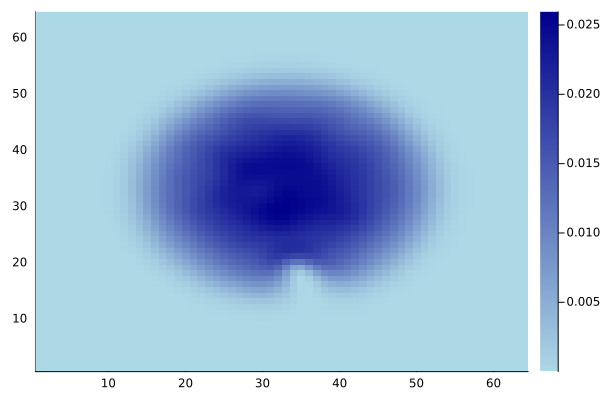

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)